In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sn
from sklearn.metrics import  classification_report


In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [3]:
print('Train dataset \n',train_df.columns)
print('Test dataset \n',test_df.columns)

Train dataset 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Test dataset 
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_df.shape

(891, 12)

In [7]:
test_df.shape

(418, 11)

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S


In [10]:
print('Train dataset wiht null values\n', train_df.isnull().sum())

Train dataset wiht null values
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
print('Test dataset wiht null values\n',test_df.isnull().sum())

Test dataset wiht null values
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<AxesSubplot:>

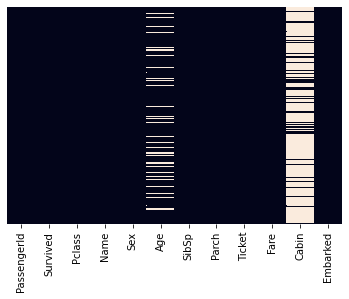

In [12]:
sn.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [13]:
train_df.drop(['Age', 'Cabin'],axis=1,inplace=True)
test_df.drop(['Age', 'Cabin'],axis=1,inplace=True)

In [14]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
    
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace = True)    

In [15]:
print ("train_df \n", train_df.isnull().sum())
print("*"*18)
print ("test_df \n", test_df.isnull().sum())

train_df 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
******************
test_df 
 PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [16]:
drop_column = ['PassengerId','Fare', 'Ticket','Name']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column, axis=1, inplace = True)

In [17]:
print('Train dataset \n',train_df.columns)
print('Test dataset \n',test_df.columns)

Train dataset 
 Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')
Test dataset 
 Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [18]:
train_df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [19]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [20]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [21]:
train_df.Parch

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [22]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


In [23]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [24]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

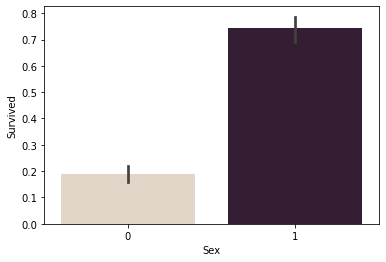

In [25]:
 sn.barplot(x="Sex", y="Survived",palette="ch:.25",  data= train_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

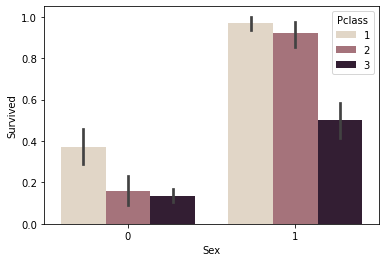

In [26]:
 sn.barplot(x="Sex", y="Survived", hue = 'Pclass',palette="ch:.25",  data= train_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

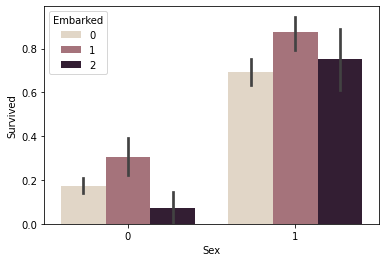

In [27]:
 sn.barplot(x="Sex", y="Survived", hue = 'Embarked',palette="ch:.25",  data= train_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

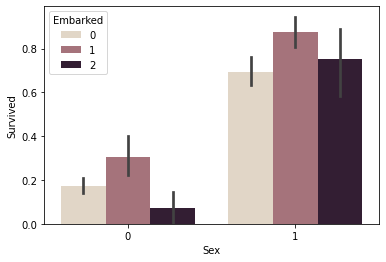

In [28]:
 sn.barplot(x="Sex", y="Survived", hue = 'Embarked',palette="ch:.25",  data= train_df)

In [29]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

<AxesSubplot:>

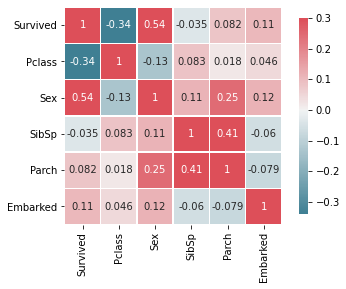

In [30]:
cmap = sn.diverging_palette(220,10,as_cmap = True)
sn.heatmap(train_df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked']].corr(),vmax =.3, center = 0, cmap=cmap, square =True,annot = True , linewidths =.5, cbar_kws={"shrink":.9})

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Embarked  891 non-null    int64
dtypes: int64(6)
memory usage: 41.9 KB


In [32]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [33]:
test_df.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [34]:
train_df.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,0,1,0,0
1,1,1,1,1,0,1
2,1,3,1,0,0,0
3,1,1,1,1,0,0
4,0,3,0,0,0,0


In [35]:
test_df.head(5)

,Pclass,Sex,SibSp,Parch,Embarked
0,3,0,0,0,2
1,3,1,1,0,0
2,2,0,0,0,2
3,3,0,0,0,0
4,3,1,1,1,0


In [36]:
Y= train_df.Survived

In [37]:
X=train_df.drop(['Survived'] , axis =1 )

In [38]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [39]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion = 'gini',random_state = 0)

In [40]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [41]:
dt.score(X_train, y_train)

0.841091492776886

In [42]:
dt.score(X_test, y_test)

0.7798507462686567

In [43]:
y_pred = dt.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       171
           1       0.81      0.52      0.63        97

    accuracy                           0.78       268
   macro avg       0.79      0.72      0.74       268
weighted avg       0.78      0.78      0.77       268



In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [46]:
lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
lr.score(X_train, y_train)

0.7929373996789727

In [48]:
lr.score(X_test, y_test)

0.8208955223880597

In [49]:
y_pred_lr = lr.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       171
           1       0.82      0.65      0.72        97

    accuracy                           0.82       268
   macro avg       0.82      0.78      0.80       268
weighted avg       0.82      0.82      0.82       268



In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)

In [52]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [53]:
clf.score(X_train , y_train)

0.8105939004815409

In [54]:
clf.score(X_test, y_test)

0.8134328358208955

In [55]:
y_pred_clf = clf.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       171
           1       0.91      0.54      0.68        97

    accuracy                           0.81       268
   macro avg       0.85      0.75      0.77       268
weighted avg       0.83      0.81      0.80       268



In [57]:
from sklearn import svm
sv = svm.SVC(kernel='poly',gamma='auto')

In [58]:
sv.fit(X_train, y_train)

SVC(gamma='auto', kernel='poly')

In [59]:
sv.score(X_train, y_train)

0.8041733547351525

In [60]:
sv.score(X_test, y_test)

0.8283582089552238

In [61]:
y_pred_svm = sv.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       171
           1       0.85      0.64      0.73        97

    accuracy                           0.83       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.83      0.83      0.82       268

